**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Sanjuktha Arhtam
- Beatrice Fernandez
- Dinh Nguyen
- Kaye Falaminiano
- Vinuthna Maradana

# Research Question

What operational, geographical, or patient-experience aspects are most strongly correlated with elevated patient satisfaction scores in hospitals within the United States? Additionally, how can these aspects be statistically linked to hospital performance metrics to enhance patient care in that context?

 - So within Hospital General Information, we are looking at different measures like facility safety measures, readmission measures and mortality measures to see which ones are the best in the hospitals.
- And within both of the datasets, we are comparing each of the unique HCAHPS patient survey star ratings (i.e. cleanliness, quietness etc.) across the overall hospital ratings to see which factors are the most relevant to higher ratings.




## Background and Prior Work

Patient satisfaction is a fundamental measure of healthcare quality. Understanding the key factors that influence patient satisfaction is essential for improving healthcare delivery. In our project, we aim to identify significant correlations between operational, geographical and patient-related factors and patient satisfaction scores. By doing so, we aim to provide action insights for healthcare administrators and policymakers. We also aim to develop evidence-based strategies to optimize patient care, improve resource allocation and enhance overall hospital performance, creating a win-win situation for both hospitals and patients.

A project that was similar to ours was the FinalProjects-SP17/052-FinalProject which was about Flu Demographics [1]. They tried to find if higher flu rate is correlated with lower income regions and used a t-test to see if the discharge/hospitalization rate is dependent on income. This project can be connected to ours as we are both comparing the quality of healthcare provided to patients that come from different backgrounds and demographics. FinalProjects-Wi21/083-FinalProject was also another project that is relatively similar to ours, talking about the correlation between median household income and a person’s likelihood of contracting COVID-19 [2]. While those projects are focused on the correlation between flu/COVID-19 rates and low income communities, ours will also be connecting the patient’s income as well as other factors that likely contribute to the overall quality and satisfaction provided by hospitals to these patients. We will be observing the ratings and reviews that multiple hospitals have in regards to patient care and see what factors play a significant role in why they were given that certain rating. We will be comparing factors in a geographical, financial, and operational context to see what higher rated hospitals have that lower rated hospitals do not and also come up with ideas as to how we can improve patient care for everyone.

Hospitals in the U.S. get rated through overall star ratings which was formed by the Centers for Medicare and Medicaid Services (CMS), the five measure groups it uses includes mortality, safety of care, readmission, patient experience and timely & effective care in which they are all equally weighted. The Overall Star Rating based on July 2023 shows that 46.4% of the hospitals got a 3 star or above on this scale and according to these five measure groups [3]. Hospitals that get higher ratings, have better scores in categories like mortality, readmissions, safety and patient experience. Overall, articles mention having better patient satisfaction and lower readmission rates lead to higher hospital ratings [4].

[1] https://github.com/COGS108/FinalProjects-Sp17/blob/master/052-FinalProject.ipynb

[2] https://github.com/COGS108/FinalProjects-Wi21/blob/main/FinalProject_group083.ipynb

[3] https://data.cms.gov/provider-data/topics/hospitals/overall-hospital-quality-star-rating/

[4] https://data.cms.gov/provider-data/topics/hospitals/overall-hospital-quality-star-rating/


# Hypothesis


We hypothesize that operational aspects, specifically the distinction between private and public hospitals, significantly influence patient satisfaction scores. Private hospitals, due to potentially better resources and management practices, are expected to have higher patient satisfaction scores compared to public hospitals. Geographically, we predict that hospitals located in states with higher healthcare funding and better healthcare infrastructure will show elevated patient satisfaction scores. Additionally, patient experience factors such as cleanliness and responsiveness of staff are hypothesized to correlate strongly with patient satisfaction. These factors will be statistically analyzed to link improvements in these areas to better hospital performance metrics, such as higher patient safety standards, thereby indicating how targeted improvements can enhance overall patient care.

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: Hospital General Information (CMS)
  - Link to the dataset:https://data.cms.gov/provider-data/dataset/xubh-q36u
  - Number of observations: 5425
  - Number of variables: 39
  
The Hospital General Information Dataset contains detailed data on U.S. hospitals, highlighting operational characteristics and performance metrics across various categories such as Hospital Type (e.g., acute care, critical access), Hospital Ownership, and Emergency Services. It includes performance metrics categorized into Mortality (MORT Measures), Safety Measures, Readmission (READM Measures), and Patient Experience (Pt Exp Measures), each quantified by measures rated as "Better," "No Different," or "Worse" compared to national standards. These metrics serve as proxies for clinical effectiveness, operational safety, patient satisfaction, and overall healthcare quality. To ensure accuracy in analysis, the dataset requires preprocessing such as cleaning missing values, standardizing categorical entries, and normalizing performance metrics based on hospital size or capacity. Additionally, it is prepared for integration with other healthcare data, ensuring consistent key identifiers like Facility ID for effective data merging and comprehensive healthcare studies.
 
 
- Dataset #2 
  - Dataset Name: HCAHPS Hospital Ratings Survey
  - Link to the dataset:https://www.kaggle.com/datasets/thedevastator/hcahps-hospital-ratings-survey
  - Number of observations: 4436
  - Number of variables: 24

This dataset includes survey data called the Hospital Consumer Assessment of Healthcare Providers and Systems (HCAHPS) from 2018-2020. This includes data from patients themselves on their experiences, in order to see the hospital’s quality. Some important variables in this dataset include patient survey star rating (ranging from 1 to 5), HCAHPS linear mean value for each hospital in order to compare hospitals and the logistics of the data like the number of completed surveys, survey response rate, the location etc. To ensure cleanliness, we need to get rid of missing values and only include survey questions that describe the star rating. 

If you plan to use multiple datasets, add a few sentences about how you plan to combine these datasets.

## Dataset #1: Hospital General Information (CMS) Dataset

In [1]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# loading the data
dataset1 = pd.read_csv("Hospital_General_Information.csv")
dataset1['State'].describe()

count     5425
unique      56
top         TX
freq       452
Name: State, dtype: object

In [3]:
# removing Variables that won't be used in analysis
columns_to_keep = [
    'Facility ID',
    'Facility Name',
    'Hospital Type',
    'Hospital Ownership',
    'Emergency Services',
    'Meets criteria for promoting interoperability of EHRs',
    'Meets criteria for birthing friendly designation',
    'Hospital overall rating',
    'Count of Facility MORT Measures',
    'Count of MORT Measures Better',
    'Count of MORT Measures No Different',
    'Count of MORT Measures Worse',
    'Count of Facility Safety Measures',
    'Count of Safety Measures Better',
    'Count of Safety Measures No Different',
    'Count of Safety Measures Worse',
    'Count of Facility READM Measures',
    'Count of READM Measures Better',
    'Count of READM Measures No Different',
    'Count of READM Measures Worse',
    
]

#df1 is the new condensed dataset with only important varibles
df1 = dataset1[columns_to_keep]
df1

,Facility ID,Facility Name,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Meets criteria for birthing friendly designation,Hospital overall rating,Count of Facility MORT Measures,Count of MORT Measures Better,Count of MORT Measures No Different,Count of MORT Measures Worse,Count of Facility Safety Measures,Count of Safety Measures Better,Count of Safety Measures No Different,Count of Safety Measures Worse,Count of Facility READM Measures,Count of READM Measures Better,Count of READM Measures No Different,Count of READM Measures Worse
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,7,1,5,1,8,2,6,0,11,0,10,1
1,010005,MARSHALL MEDICAL CENTERS,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,NaN,2,6,0,4,2,7,0,6,1,10,0,10,0
2,010006,NORTH ALABAMA MEDICAL CENTER,Acute Care Hospitals,Proprietary,Yes,Y,Y,1,7,0,5,2,7,2,5,0,9,0,7,2
3,010007,MIZELL MEMORIAL HOSPITAL,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,NaN,2,3,0,3,0,2,0,2,0,6,0,5,1
4,010008,CRENSHAW COMMUNITY HOSPITAL,Acute Care Hospitals,Proprietary,Yes,Y,NaN,Not Available,1,0,1,0,Not Available,Not Available,Not Available,Not Available,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5420,670300,METHODIST MIDLOTHIAN MEDICAL CENTER,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,Y,Not Available,Not Available,Not Available,Not Available,Not Available,2,0,2,0,2,0,2,0
5421,670309,TEXAS HEALTH HOSPITAL MANSFIELD,Acute Care Hospitals,Proprietary,Yes,Y,Y,Not Available,Not Available,Not Available,Not Available,Not Available,2,0,2,0,1,0,1,0
5422,670310,SE TEXAS ER & HOSPITAL,Acute Care Hospitals,Physician,No,NaN,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
5423,670314,ST MICHAELS MEDICAL HOSPITAL LLC,Acute Care Hospitals,Proprietary,Yes,NaN,NaN,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available


In [4]:
#Checking basics of the Data
print(df1.shape)
print(df1.dtypes)
print(df1.isnull().sum())

(5425, 20)
Facility ID                                              object
Facility Name                                            object
Hospital Type                                            object
Hospital Ownership                                       object
Emergency Services                                       object
Meets criteria for promoting interoperability of EHRs    object
Meets criteria for birthing friendly designation         object
Hospital overall rating                                  object
Count of Facility MORT Measures                          object
Count of MORT Measures Better                            object
Count of MORT Measures No Different                      object
Count of MORT Measures Worse                             object
Count of Facility Safety Measures                        object
Count of Safety Measures Better                          object
Count of Safety Measures No Different                    object
Count of Safety Measures Wors

In [5]:
#Replace non-standard missing values with NaN
df1.replace("Not Available", np.nan, inplace=True)

#Check for missing values again
print(df1.isnull().sum())

Facility ID                                                 0
Facility Name                                               0
Hospital Type                                               0
Hospital Ownership                                          0
Emergency Services                                          0
Meets criteria for promoting interoperability of EHRs    1625
Meets criteria for birthing friendly designation         3200
Hospital overall rating                                  2383
Count of Facility MORT Measures                          1689
Count of MORT Measures Better                            1689
Count of MORT Measures No Different                      1689
Count of MORT Measures Worse                             1689
Count of Facility Safety Measures                        1946
Count of Safety Measures Better                          1946
Count of Safety Measures No Different                    1946
Count of Safety Measures Worse                           1946
Count of

/var/folders/3b/3q1j6drd6_1flkqx_h3nk7080000gn/T/ipykernel_14223/3004946865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("Not Available", np.nan, inplace=True)


In [6]:
#Drop the missing Data
df1_cleaned = df1.dropna()

#Change objects to integers
columns_to_convert = ['Hospital overall rating', 'Count of Facility MORT Measures', 'Count of MORT Measures Better', 'Count of MORT Measures No Different', 'Count of MORT Measures Worse', 'Count of Facility Safety Measures', 'Count of Safety Measures Better', 'Count of Safety Measures No Different', 'Count of Safety Measures Worse', 'Count of Facility READM Measures', 'Count of READM Measures Better', 'Count of READM Measures No Different', 'Count of READM Measures Worse']
df1_cleaned[columns_to_convert] = df1_cleaned[columns_to_convert].astype(int)

#Recheck the cleaned Data
df1_cleaned.head(10)
df1_cleaned

/var/folders/3b/3q1j6drd6_1flkqx_h3nk7080000gn/T/ipykernel_14223/3664617641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned[columns_to_convert] = df1_cleaned[columns_to_convert].astype(int)


,Facility ID,Facility Name,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Meets criteria for birthing friendly designation,Hospital overall rating,Count of Facility MORT Measures,Count of MORT Measures Better,Count of MORT Measures No Different,Count of MORT Measures Worse,Count of Facility Safety Measures,Count of Safety Measures Better,Count of Safety Measures No Different,Count of Safety Measures Worse,Count of Facility READM Measures,Count of READM Measures Better,Count of READM Measures No Different,Count of READM Measures Worse
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,3,7,1,5,1,8,2,6,0,11,0,10,1
2,010006,NORTH ALABAMA MEDICAL CENTER,Acute Care Hospitals,Proprietary,Yes,Y,Y,1,7,0,5,2,7,2,5,0,9,0,7,2
7,010016,SHELBY BAPTIST MEDICAL CENTER,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,Y,4,7,0,7,0,7,2,5,0,9,0,8,1
12,010023,BAPTIST MEDICAL CENTER SOUTH,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,Y,2,7,0,6,1,7,0,4,3,11,1,9,1
13,010024,JACKSON HOSPITAL & CLINIC INC,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,Y,1,7,0,6,1,7,0,4,3,11,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,670088,BAYLOR SCOTT & WHITE MEDICAL CENTER- COLLEGE S...,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,Y,4,7,0,7,0,8,1,7,0,11,1,10,0
5392,670103,MEDICAL CITY ALLIANCE,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,Y,4,4,0,4,0,5,1,4,0,7,0,7,0
5395,670108,BAYLOR SCOTT & WHITE MEDICAL CENTER - MARBLE F...,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,Y,5,4,0,4,0,3,1,2,0,9,1,8,0
5400,670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,Acute Care Hospitals,Proprietary,Yes,Y,Y,2,5,0,5,0,7,1,5,1,8,0,7,1


I decided to drop rows with missing information due to the significant proportion of missing values in key variables, which could introduce bias and affect the reliability of the analysis. Additionally, the missing data is likely due to privacy constraints, and imputing such a large amount of data could compromise the integrity and accuracy of the results.

In [7]:
print(df1_cleaned.dtypes)
print(df1_cleaned.isnull().sum())
print(df1_cleaned.shape)

Facility ID                                              object
Facility Name                                            object
Hospital Type                                            object
Hospital Ownership                                       object
Emergency Services                                       object
Meets criteria for promoting interoperability of EHRs    object
Meets criteria for birthing friendly designation         object
Hospital overall rating                                   int64
Count of Facility MORT Measures                           int64
Count of MORT Measures Better                             int64
Count of MORT Measures No Different                       int64
Count of MORT Measures Worse                              int64
Count of Facility Safety Measures                         int64
Count of Safety Measures Better                           int64
Count of Safety Measures No Different                     int64
Count of Safety Measures Worse          

## Dataset #2: HCAHPS Hospital Ratings Survey

In [8]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

In [10]:
# read and display the csv file 
dataset2 = pd.read_csv("Patient_survey__HCAHPS__-_Hospital.csv")
# dataset2.columns

In [11]:
# filter out uneccessary columns
df2 = dataset2.drop(['index', 'Address', 'City','County Name','Phone Number', 
                     'Number of Completed Surveys Footnote','Measure Start Date',
                     'Measure End Date', 'Location'], axis=1)
df2

,Provider ID,Hospital Name,State,ZIP Code,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Survey Response Rate Percent,Survey Response Rate Percent Footnote
0,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,H_CLEAN_STAR_RATING,Cleanliness - star rating,Cleanliness - star rating,2,NaN,Not Applicable,NaN,Not Applicable,342,22%,NaN
1,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,Cleanliness - linear mean score,Not Applicable,NaN,Not Applicable,NaN,84,342,22%,NaN
2,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...","Nurses ""usually"" communicated well",Not Applicable,NaN,16,NaN,Not Applicable,342,22%,NaN
3,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,H_COMP_5_LINEAR_SCORE,Communication about medicines - linear mean score,Communication about medicines - linear mean score,Not Applicable,NaN,Not Applicable,NaN,80,342,22%,NaN
4,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,H_COMP_3_STAR_RATING,Staff responsiveness - star rating,Staff responsiveness - star rating,4,NaN,Not Applicable,NaN,Not Applicable,342,22%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254535,320021,PRESBYTERIAN HOSPITAL,NM,87106,H_HSP_RATING_7_8,Patients who gave their hospital a rating of 7...,"Patients who gave a rating of ""7"" or ""8"" (medium)",Not Applicable,NaN,21,NaN,Not Applicable,1289,26%,NaN
254536,320021,PRESBYTERIAN HOSPITAL,NM,87106,H_QUIET_LINEAR_SCORE,Quietness - linear mean score,Quietness - linear mean score,Not Applicable,NaN,Not Applicable,NaN,79,1289,26%,NaN
254537,320021,PRESBYTERIAN HOSPITAL,NM,87106,H_RECMND_STAR_RATING,Recommend hospital - star rating,Recommend hospital - star rating,4,NaN,Not Applicable,NaN,Not Applicable,1289,26%,NaN
254538,320021,PRESBYTERIAN HOSPITAL,NM,87106,H_RECMND_PY,"Patients who reported YES, they would probably...","""YES"", patients would probably recommend the h...",Not Applicable,NaN,20,NaN,Not Applicable,1289,26%,NaN


In [12]:
# check for null values 
print(df2.shape)
print(df2.isnull().sum())

(254540, 15)
Provider ID                                   0
Hospital Name                                 0
State                                         0
ZIP Code                                      0
HCAHPS Measure ID                             0
HCAHPS Question                               0
HCAHPS Answer Description                     0
Patient Survey Star Rating                    0
Patient Survey Star Rating Footnote      240824
HCAHPS Answer Percent                         0
HCAHPS Answer Percent Footnote           215244
HCAHPS Linear Mean Value                      0
Number of Completed Surveys                   0
Survey Response Rate Percent              24145
Survey Response Rate Percent Footnote    186945
dtype: int64


In [13]:
# drop the footnote columns
df2 = df2.drop(['Patient Survey Star Rating Footnote','Survey Response Rate Percent Footnote',
                'HCAHPS Answer Percent Footnote', 'Survey Response Rate Percent'], axis=1)
df2.isnull().sum()

Provider ID                    0
Hospital Name                  0
State                          0
ZIP Code                       0
HCAHPS Measure ID              0
HCAHPS Question                0
HCAHPS Answer Description      0
Patient Survey Star Rating     0
HCAHPS Answer Percent          0
HCAHPS Linear Mean Value       0
Number of Completed Surveys    0
dtype: int64

In [14]:
df2 = df2.drop(['HCAHPS Answer Percent', 'HCAHPS Answer Description', 'Number of Completed Surveys', 'HCAHPS Measure ID', 'HCAHPS Linear Mean Value'], axis=1)
df2

,Provider ID,Hospital Name,State,ZIP Code,HCAHPS Question,Patient Survey Star Rating
0,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Cleanliness - star rating,2
1,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Cleanliness - linear mean score,Not Applicable
2,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,"Patients who reported that their nurses ""Usual...",Not Applicable
3,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Communication about medicines - linear mean score,Not Applicable
4,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Staff responsiveness - star rating,4
...,...,...,...,...,...,...
254535,320021,PRESBYTERIAN HOSPITAL,NM,87106,Patients who gave their hospital a rating of 7...,Not Applicable
254536,320021,PRESBYTERIAN HOSPITAL,NM,87106,Quietness - linear mean score,Not Applicable
254537,320021,PRESBYTERIAN HOSPITAL,NM,87106,Recommend hospital - star rating,4
254538,320021,PRESBYTERIAN HOSPITAL,NM,87106,"Patients who reported YES, they would probably...",Not Applicable


In [15]:
df1_cleaned['Facility ID']

0       010001
2       010006
7       010016
12      010023
13      010024
         ...  
5387    670088
5392    670103
5395    670108
5400    670120
5402    670122
Name: Facility ID, Length: 1903, dtype: object

In [16]:
# inconsistency between number formats observed (look at minimum and compare it with df1)
df2['Provider ID'].describe()

count    254540.000000
mean     266301.328003
std      155768.508256
min       10001.000000
25%      140170.750000
50%      251334.500000
75%      390137.250000
max      670108.000000
Name: Provider ID, dtype: float64

In [17]:
# ensure 'Facility ID' and 'Provider ID' are treated as strings
df1_cleaned['Facility ID'] = df1_cleaned['Facility ID'].astype(str)
df2['Provider ID'] = df2['Provider ID'].astype(str)

# pad 'Provider ID' with leading zeros to ensure they are 6 characters long
df2['Provider ID'] = df2['Provider ID'].str.zfill(6)

# padding works!
df2['Provider ID'].min()

/var/folders/3b/3q1j6drd6_1flkqx_h3nk7080000gn/T/ipykernel_14223/254515721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_cleaned['Facility ID'] = df1_cleaned['Facility ID'].astype(str)


'010001'

In [18]:
# Get the list of IDs from df1_cleaned
common_ids = df1_cleaned['Facility ID']
common_ids

0       010001
2       010006
7       010016
12      010023
13      010024
         ...  
5387    670088
5392    670103
5395    670108
5400    670120
5402    670122
Name: Facility ID, Length: 1903, dtype: object

In [19]:
# Filter df2 to keep only rows with IDs present in common_ids
df2_cleaned = df2[df2['Provider ID'].isin(common_ids)]
df2_cleaned

,Provider ID,Hospital Name,State,ZIP Code,HCAHPS Question,Patient Survey Star Rating
0,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Cleanliness - star rating,2
1,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Cleanliness - linear mean score,Not Applicable
2,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,"Patients who reported that their nurses ""Usual...",Not Applicable
3,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Communication about medicines - linear mean score,Not Applicable
4,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Staff responsiveness - star rating,4
...,...,...,...,...,...,...
254535,320021,PRESBYTERIAN HOSPITAL,NM,87106,Patients who gave their hospital a rating of 7...,Not Applicable
254536,320021,PRESBYTERIAN HOSPITAL,NM,87106,Quietness - linear mean score,Not Applicable
254537,320021,PRESBYTERIAN HOSPITAL,NM,87106,Recommend hospital - star rating,4
254538,320021,PRESBYTERIAN HOSPITAL,NM,87106,"Patients who reported YES, they would probably...",Not Applicable


In the Data Dictionary of the first dataset, the pdf included information about both the Hospital General Information dataset as well as the second dataset which is the HCAHPS survey data where it is mentioned that the facility ID and provider ID are the same thing. So we used this variable to combine both datasets.

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Dataset 1: Histograms

We calculated the means within all the facilities, grouped by the number of measures in order to compare the better measures, no different measures and the worse measures.

Then created the histograms for mortality measures, safety measures and readmission measures which we then compared.

In [20]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [21]:
# Count of Facility MORT Measures grouped together with the mean

df1_cleaned.groupby('Count of Facility MORT Measures')[['Count of MORT Measures Better', 'Count of MORT Measures No Different', 'Count of MORT Measures Worse']].mean()


,Count of MORT Measures Better,Count of MORT Measures No Different,Count of MORT Measures Worse
Count of Facility MORT Measures,,,
1,0.000000,1.000000,0.000000
2,0.032258,1.967742,0.000000
3,0.000000,2.959391,0.040609
4,0.023364,3.897196,0.079439
5,0.063830,4.829787,0.106383
6,0.185000,5.655000,0.160000
7,0.398317,6.330996,0.270687


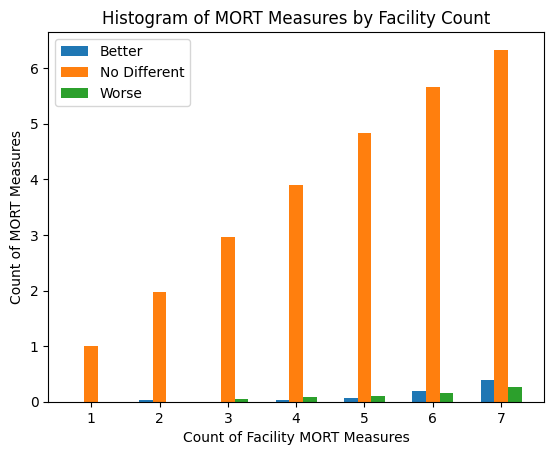

In [22]:
# Data
counts = np.array([1, 2, 3, 4, 5, 6, 7])
better = np.array([0.000000, 0.032258, 0.000000, 0.023364, 0.063830, 0.185000, 0.398317])
no_different = np.array([1.000000, 1.967742, 2.959391, 3.897196, 4.829787, 5.655000, 6.330996])
worse = np.array([0.000000, 0.000000, 0.040609, 0.079439, 0.106383, 0.160000, 0.270687])
fig, ax = plt.subplots()

width = 0.2  # the width of the bars
ax.bar(counts - width, better, width, label='Better')
ax.bar(counts, no_different, width, label='No Different')
ax.bar(counts + width, worse, width, label='Worse')

# Labels and title
ax.set_xlabel('Count of Facility MORT Measures')
ax.set_ylabel('Count of MORT Measures')
ax.set_title('Histogram of MORT Measures by Facility Count')
ax.set_xticks(counts)
ax.legend()

# Display the plot
plt.show()

**What is this distribution?**
- In the Hospital General Information dataset, they have up to 7 mortality measures but each hospital varies with the count from 1 measure to 7 measures. So this histogram shows which number of measures are better, no different or worse and compares it across the number facility mortality measures to be better in scale.

**Are there any outliers?**
- I think like the lower number of facility MORT measures like 3 has no better measures at all which is an outlier.

**Relationship between variables?**
- For this histogram, the count of MORT measures that are no different are much higher than better or worse count measures. So that means the mortality statistics are pretty much the same across various hospitals and throughout the different count of facility MORT measures.

In [32]:
# Define the columns for correlation
better_mort_measures = df1_cleaned['Count of MORT Measures Better']
no_different_mort_measures = df1_cleaned['Count of MORT Measures No Different']
worse_mort_measures = df1_cleaned['Count of MORT Measures Worse']
overall_rating = df1_cleaned['Hospital overall rating']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient_better, _ = pearsonr(better_mort_measures, overall_rating)
correlation_coefficient_no_different, _ = pearsonr(no_different_mort_measures, overall_rating)
correlation_coefficient_worse, _ = pearsonr(worse_mort_measures, overall_rating)

print("Pearson correlation coefficient (Better Mortality Measures):", correlation_coefficient_better)
print("Pearson correlation coefficient (No Different Mortality Measures):", correlation_coefficient_no_different)
print("Pearson correlation coefficient (Worse Mortality Measures):", correlation_coefficient_worse)

Pearson correlation coefficient (Better Mortality Measures): 0.22584021509777966
Pearson correlation coefficient (No Different Mortality Measures): -0.023363366693024835
Pearson correlation coefficient (Worse Mortality Measures): -0.2910761755494017


In [26]:
# Count of Facility Safety Measures grouped together with the mean
df1_cleaned.groupby('Count of Facility Safety Measures')[['Count of Safety Measures Better', 'Count of Safety Measures No Different', 'Count of Safety Measures Worse']].mean()

,Count of Safety Measures Better,Count of Safety Measures No Different,Count of Safety Measures Worse
Count of Facility Safety Measures,,,
1,0.000000,1.000000,0.000000
2,0.045455,1.920455,0.034091
3,0.142857,2.836735,0.020408
4,0.289474,3.578947,0.131579
5,0.546763,4.230216,0.223022
6,0.831776,4.789720,0.378505
7,1.182099,5.413580,0.404321
8,1.749522,5.760994,0.489484


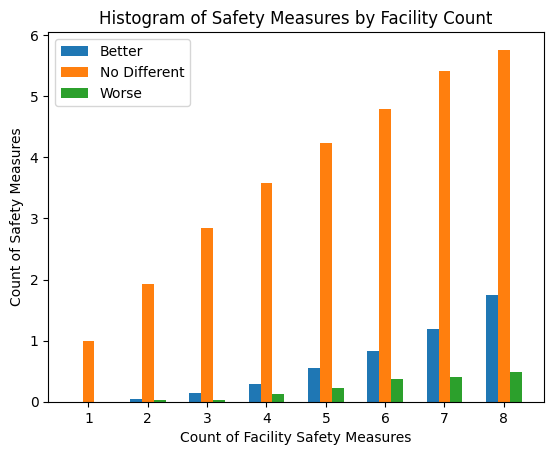

In [27]:
# Histogram 2: Facility Safety Measures
counts_safety = np.array([1, 2, 3, 4, 5, 6, 7, 8])
better_safety = np.array([0.000000, 0.045455, 0.142857, 0.289474, 0.546763, 0.831776, 1.182099, 1.749522])
no_different_safety = np.array([1.000000, 1.920455, 2.836735, 3.578947, 4.230216, 4.789720, 5.413580, 5.760994])
worse_safety = np.array([0.000000, 0.034091, 0.020408, 0.131579, 0.223022, 0.378505, 0.404321, 0.489484])

# Plot for Safety Measures
fig, ax = plt.subplots()

width = 0.2  # the width of the bars
ax.bar(counts_safety - width, better_safety, width, label='Better')
ax.bar(counts_safety, no_different_safety, width, label='No Different')
ax.bar(counts_safety + width, worse_safety, width, label='Worse')

# Labels and title
ax.set_xlabel('Count of Facility Safety Measures')
ax.set_ylabel('Count of Safety Measures')
ax.set_title('Histogram of Safety Measures by Facility Count')
ax.set_xticks(counts_safety)
ax.legend()

# Display the plot
plt.show()

**What is this distribution?**
- In the Hospital General Information dataset, they have up to 8 safety measures but each hospital varies with the count from 1 measure to 8 measures. So this histogram shows which number of measures are better, no different or worse and compares it across the number facility safety measures to be better in scale.

**Are there any outliers?**
- I don't think so, all the measures except 1 has all better, no different and worse safety measure count.

**Relationship between variables?**
- For Safety measures, there definitely are higher number of better safety measures than there are higher number of better mortality measures which means the hospitals have higher number of better safety measures.
- But the main thing is that most of the safety measures are no different from other facilities.

In [31]:
better_safety_measures = df1_cleaned['Count of Safety Measures Better']
no_different_safety_measures = df1_cleaned['Count of Safety Measures No Different']
worse_safety_measures = df1_cleaned['Count of Safety Measures Worse']
overall_rating = df1_cleaned['Hospital overall rating']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient_better, _ = pearsonr(better_safety_measures, overall_rating)
correlation_coefficient_no_different, _ = pearsonr(no_different_safety_measures, overall_rating)
correlation_coefficient_worse, _ = pearsonr(worse_safety_measures, overall_rating)

print("Pearson correlation coefficient (Better Safety Measures):", correlation_coefficient_better)
print("Pearson correlation coefficient (No Different Safety Measures):", correlation_coefficient_no_different)
print("Pearson correlation coefficient (Worse Safety Measures):", correlation_coefficient_worse)

Pearson correlation coefficient (Better Safety Measures): 0.12070971600610758
Pearson correlation coefficient (No Different Safety Measures): 0.02334569679168329
Pearson correlation coefficient (Worse Safety Measures): -0.2980728146442857


In [25]:
# Count of Facility READM Measures grouped together with the mean
df1_cleaned.groupby('Count of Facility READM Measures')[['Count of READM Measures Better', 'Count of READM Measures No Different', 'Count of READM Measures Worse']].mean()

,Count of READM Measures Better,Count of READM Measures No Different,Count of READM Measures Worse
Count of Facility READM Measures,,,
1,0.000000,1.000000,0.000000
2,0.400000,1.400000,0.200000
3,0.142857,2.857143,0.000000
4,0.166667,3.583333,0.250000
5,0.237288,4.389831,0.372881
6,0.232323,5.393939,0.373737
7,0.341014,6.152074,0.506912
8,0.332103,6.878229,0.789668
9,0.384615,7.926036,0.689349


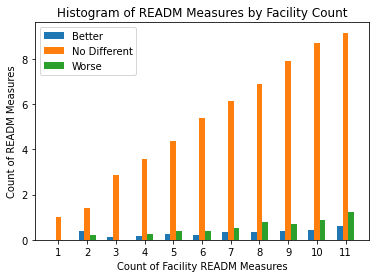

In [26]:
# Histogram 3: READM (readmission) measures
counts_readm = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
better_readm = np.array([0.000000, 0.400000, 0.142857, 0.166667, 0.237288, 0.232323, 0.341014, 0.332103, 0.384615, 0.437500, 0.604167])
no_different_readm = np.array([1.000000, 1.400000, 2.857143, 3.583333, 4.389831, 5.393939, 6.152074, 6.878229, 7.926036, 8.684659, 9.160985])
worse_readm = np.array([0.000000, 0.200000, 0.000000, 0.250000, 0.372881, 0.373737, 0.506912, 0.789668, 0.689349, 0.877841, 1.234848])

# Plot for READM Measures
fig, ax = plt.subplots()

width = 0.2  # the width of the bars
ax.bar(counts_readm - width, better_readm, width, label='Better')
ax.bar(counts_readm, no_different_readm, width, label='No Different')
ax.bar(counts_readm + width, worse_readm, width, label='Worse')

# Labels and title
ax.set_xlabel('Count of Facility READM Measures')
ax.set_ylabel('Count of READM Measures')
ax.set_title('Histogram of READM Measures by Facility Count')
ax.set_xticks(counts_readm)
ax.legend()

# Display the plot
plt.show()

**What is this distribution?**
- In the Hospital General Information dataset, they have up to 11 readmission measures but each hospital varies with the count from 1 measure to 11 measures. So this histogram shows which number of measures are better, no different or worse and compares it across the number facility readmission measures to be better in scale.

**Are there any outliers?**
- For this one, the 3rd count of facility readmission measures there are no worse measures but this can be accounted for since there are less counts of measures in general.

**Relationship between variables?**
- For this one, the readmission measures have slightly more worse facility readmission measures than the other histograms.
- But mostly they are no different from the other facilities.

In [33]:
# Define the columns for correlation
better_readm_measures = df1_cleaned['Count of READM Measures Better']
no_different_readm_measures = df1_cleaned['Count of READM Measures No Different']
worse_readm_measures = df1_cleaned['Count of READM Measures Worse']
overall_rating = df1_cleaned['Hospital overall rating']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient_better, _ = pearsonr(better_readm_measures, overall_rating)
correlation_coefficient_no_different, _ = pearsonr(no_different_readm_measures, overall_rating)
correlation_coefficient_worse, _ = pearsonr(worse_readm_measures, overall_rating)

print("Pearson correlation coefficient (Better Readmission Measures):", correlation_coefficient_better)
print("Pearson correlation coefficient (No Different Readmission Measures):", correlation_coefficient_no_different)
print("Pearson correlation coefficient (Worse Readmission Measures):", correlation_coefficient_worse)

Pearson correlation coefficient (Better Readmission Measures): 0.32558307578910095
Pearson correlation coefficient (No Different Readmission Measures): 0.1347438882100435
Pearson correlation coefficient (Worse Readmission Measures): -0.31214610738344745


For all 3 histograms, the main point is that within all of these various measures we calculated in Dataset 1 most facilities are similar to one another with a few discrepancies in the histograms. Something to note is that the lower number of count facility measures there are, the more likely they are an outlier so we shouldn't count those.

### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [27]:
df2

,Provider ID,Hospital Name,State,ZIP Code,HCAHPS Question,Patient Survey Star Rating
0,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Cleanliness - star rating,2
1,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Cleanliness - linear mean score,Not Applicable
2,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,"Patients who reported that their nurses ""Usual...",Not Applicable
3,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Communication about medicines - linear mean score,Not Applicable
4,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Staff responsiveness - star rating,4
...,...,...,...,...,...,...
254535,320021,PRESBYTERIAN HOSPITAL,NM,87106,Patients who gave their hospital a rating of 7...,Not Applicable
254536,320021,PRESBYTERIAN HOSPITAL,NM,87106,Quietness - linear mean score,Not Applicable
254537,320021,PRESBYTERIAN HOSPITAL,NM,87106,Recommend hospital - star rating,4
254538,320021,PRESBYTERIAN HOSPITAL,NM,87106,"Patients who reported YES, they would probably...",Not Applicable


In [28]:
# Remove the not applicable and nan values for patient survey star rating column
df2_cleaned = df2[df2['Patient Survey Star Rating'] != 'Not Applicable']
df2_cleaned['Patient Survey Star Rating'] = pd.to_numeric(df2_cleaned['Patient Survey Star Rating'], errors='coerce')
df2_cleaned = df2_cleaned.dropna(subset=['Patient Survey Star Rating'])
df2_cleaned

/tmp/ipykernel_730/2028045691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned['Patient Survey Star Rating'] = pd.to_numeric(df2_cleaned['Patient Survey Star Rating'], errors='coerce')


,Provider ID,Hospital Name,State,ZIP Code,HCAHPS Question,Patient Survey Star Rating
0,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Cleanliness - star rating,2.0
4,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Staff responsiveness - star rating,4.0
6,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Discharge information - star rating,3.0
11,320022,PLAINS REGIONAL MEDICAL CENTER,NM,88101,Care transition - star rating,2.0
13,320030,ARTESIA GENERAL HOSPITAL,NM,88210,Summary star rating,4.0
...,...,...,...,...,...,...
254520,320018,MEMORIAL MEDICAL CENTER INC,NM,88011,Quietness - star rating,3.0
254524,320021,PRESBYTERIAN HOSPITAL,NM,87106,Nurse communication - star rating,3.0
254530,320021,PRESBYTERIAN HOSPITAL,NM,87106,Pain management - star rating,3.0
254533,320021,PRESBYTERIAN HOSPITAL,NM,87106,Discharge information - star rating,3.0


Text(0.5, 1.0, 'Average Hospital Ratings for Selected Hospitals (Dataset 2)')

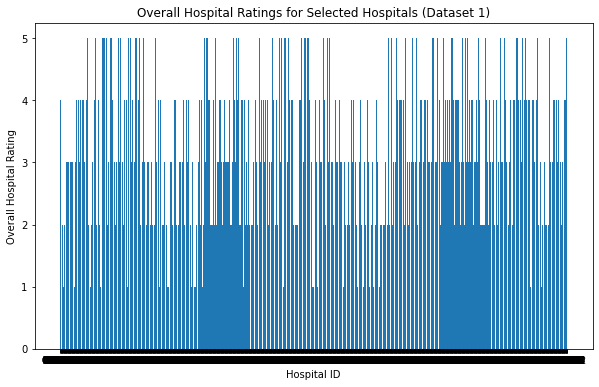

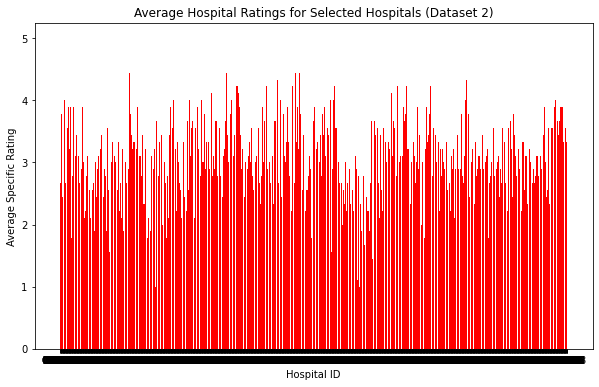

In [29]:
# Ensure all Provider IDs have 6 digits
df2_cleaned['Provider ID'] = df2_cleaned['Provider ID'].apply(lambda x: f'{int(x):06d}')

hospitals = df1_cleaned['Facility ID'].unique().tolist()

df2_hospitals = df2_cleaned[df2_cleaned['Provider ID'].isin(hospitals)]

# Assigning survey questions as variables
variables = df2_hospitals['HCAHPS Question'].isin([
    'Cleanliness - star rating',
    'Staff responsiveness - star rating',
    'Recommend hospital - star rating',
    'Discharge information - star rating',
    'Care transition - star rating',
    'Nurse communication - star rating',
    'Pain management - star rating',
    'Summary star rating',
    'Quietness - star rating'
])
df2_filtered = df2_hospitals[variables]

# Calculate the average star rating for each hospital for the chosen questions
df_avg_ratings = df2_filtered.groupby('Provider ID')['Patient Survey Star Rating'].mean().reset_index()
df_avg_ratings.columns = ['Provider ID', 'Average Specific Questions Rating']

# Plot the overall star rating of the hospitals
df1_hospitals = df1_cleaned[df1_cleaned['Facility ID'].isin(hospitals)]
plt.figure(figsize=(10, 6))
plt.bar(df1_hospitals['Facility ID'], df1_hospitals['Hospital overall rating'])
plt.xlabel('Hospital ID')
plt.ylabel('Overall Hospital Rating')
plt.title('Overall Hospital Ratings for Selected Hospitals (Dataset 1)')

# Plot the average star rating for each hospital
plt.figure(figsize=(10, 6))
plt.bar(df_avg_ratings['Provider ID'], df_avg_ratings['Average Specific Questions Rating'], color='red')
plt.xlabel('Hospital ID')
plt.ylabel('Average Specific Rating')
plt.title('Average Hospital Ratings for Selected Hospitals (Dataset 2)')

**What is this distribution?**
- The dataset distribution is all the hospitals from Dataset #1 & Dataset #2, with information from Dataset #1 being the cumulative average star rating of each hospital after considering every star rating category. The two graphs aim to show the similarity/differences between ratings of hospitals in Dataset #1 vs. Dataset #2. The first graph should display the overall hospital ratings for the selected hospitals from Dataset 1. The second graph should display the average ratings of specific questions for the same hospitals from Dataset 2.

**Are there any outliers?**
- The data shows some disparity between each other, with the noticeable outlier being the third hospital chosen (ID: 320022, Memorial Hospital West), with a difference of 1.0 (out of a 5.0 scale) of rating between Dataset #1 & #2. This is likely a result of certain star ratings not being accounted for -or used- in certain hospitals.

**Relationship between variables?**
- There appears to be a correlation between the calculated average star rating from Dataset 2 and the overall rating from Dataset 1, indicating a significant level of interconnectedness between the two datasets. Hospitals that perform well in specific questions tend to have higher overall ratings.

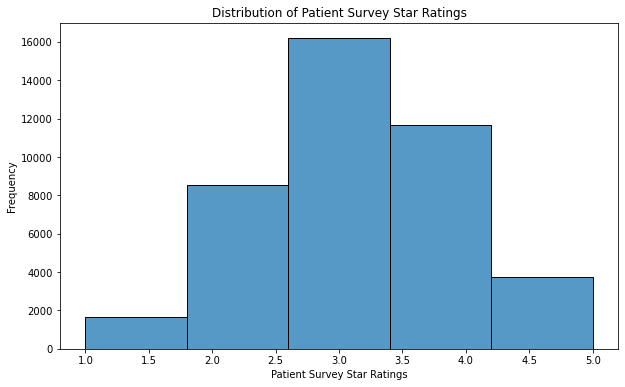

In [30]:
# Plot the distribution of patient survey star ratings across all hospitals
plt.figure(figsize=(10, 6))
sns.histplot(df2_cleaned['Patient Survey Star Rating'], bins=5)
plt.xlabel('Patient Survey Star Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Patient Survey Star Ratings')
plt.show()

In [31]:
# Distribution of ratings across different states
state_avg_ratings = df2_cleaned.groupby('State')['Patient Survey Star Rating'].mean().reset_index()
state_avg_ratings_sorted = state_avg_ratings.sort_values(by='Patient Survey Star Rating', ascending=False)
state_avg_ratings

,State,Patient Survey Star Rating
0,AK,3.378788
1,AL,3.293427
2,AR,3.163399
3,AZ,2.913978
4,CA,2.597875
5,CO,3.534591
6,CT,2.898148
7,DC,1.892857
8,DE,3.097222
9,FL,2.667653


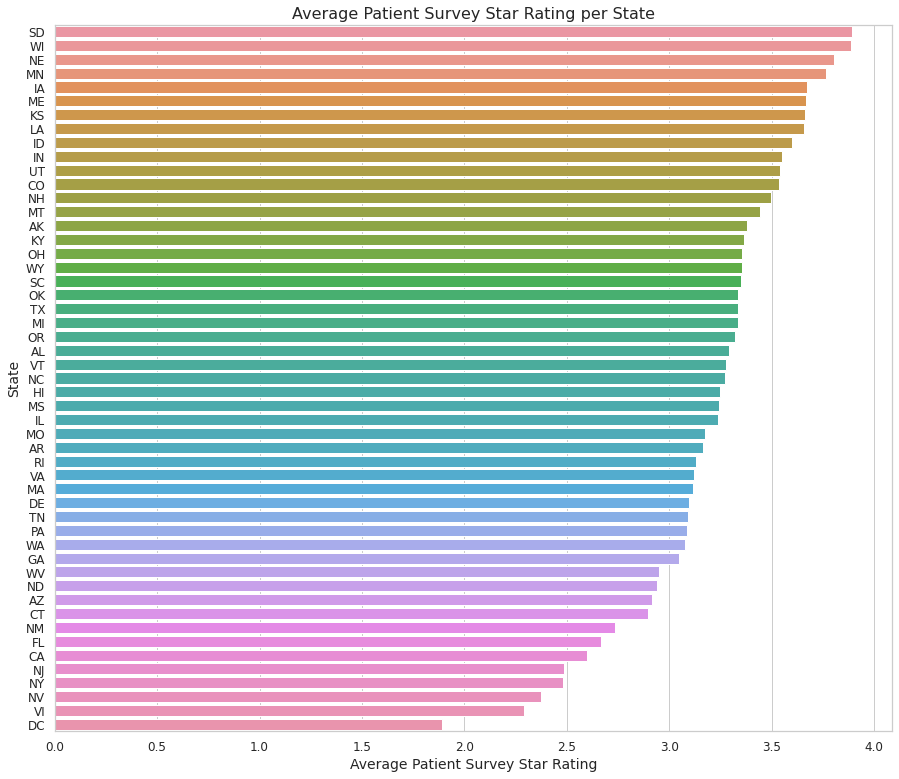

In [32]:
# Plot the average Patient Survey Star Rating per state with improved aesthetics
plt.figure(figsize=(15, 13))
sns.set_theme(style="whitegrid")


sns.barplot(x='Patient Survey Star Rating', y='State', data=state_avg_ratings_sorted)
plt.xlabel('Average Patient Survey Star Rating', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.title('Average Patient Survey Star Rating per State', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [33]:
# Patient star ratings for each hospital (based on the provider ID)
unique_ratings_per_provider = df2_cleaned.groupby('Provider ID')['Patient Survey Star Rating'].unique().reset_index()
print(unique_ratings_per_provider)

     Provider ID Patient Survey Star Rating
0         010001            [3.0, 2.0, 4.0]
1         010005            [4.0, 2.0, 3.0]
2         010006       [2.0, 3.0, 4.0, 1.0]
3         010007            [4.0, 3.0, 5.0]
4         010011            [3.0, 2.0, 1.0]
...          ...                        ...
3480      670082                 [4.0, 3.0]
3481      670085                 [3.0, 4.0]
3482      670088                 [4.0, 3.0]
3483      670092            [2.0, 3.0, 5.0]
3484      670096            [2.0, 3.0, 5.0]

[3485 rows x 2 columns]


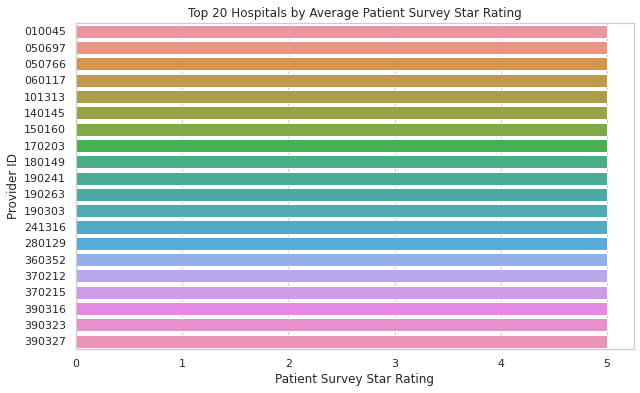

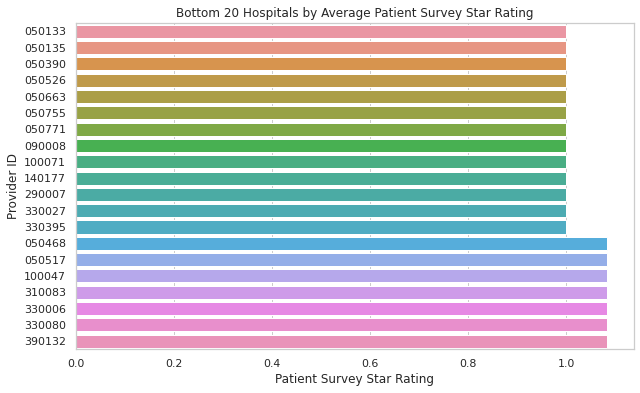

In [34]:
# Calculate average rating per Provider ID
avg_ratings_per_hospital = df2_cleaned.groupby('Provider ID')['Patient Survey Star Rating'].mean().reset_index()

# Top 10 hospitals
top_hospitals = avg_ratings_per_hospital.nlargest(20, 'Patient Survey Star Rating')
plt.figure(figsize=(10, 6))
sns.barplot(x='Patient Survey Star Rating', y='Provider ID', data=top_hospitals)
plt.title('Top 20 Hospitals by Average Patient Survey Star Rating')
plt.show()

# Bottom 10 hospitals
bottom_hospitals = avg_ratings_per_hospital.nsmallest(20, 'Patient Survey Star Rating')
plt.figure(figsize=(10, 6))
sns.barplot(x='Patient Survey Star Rating', y='Provider ID', data=bottom_hospitals)
plt.title('Bottom 20 Hospitals by Average Patient Survey Star Rating')
plt.show()

In [35]:
unique_ratings_per_hospital = df2_cleaned.groupby('Hospital')['Patient Survey Star Rating'].unique().reset_index()
print(unique_ratings_per_hospital)

KeyError: 'Hospital'

In [ ]:
# Calculate average rating per hospital
avg_ratings_per_hospital = df2_cleaned.groupby('Hospital Name')['Patient Survey Star Rating'].mean().reset_index()

# Top 10 hospitals
top_hospitals = avg_ratings_per_hospital.nlargest(20, 'Patient Survey Star Rating')
plt.figure(figsize=(10, 6))
sns.barplot(x='Patient Survey Star Rating', y='Hospital Name', data=top_hospitals)
plt.title('Top 20 Hospitals by Average Patient Survey Star Rating')
plt.show()

# Bottom 10 hospitals
bottom_hospitals = avg_ratings_per_hospital.nsmallest(20, 'Patient Survey Star Rating')
plt.figure(figsize=(10, 6))
sns.barplot(x='Patient Survey Star Rating', y='Hospital Name', data=bottom_hospitals)
plt.title('Bottom 20 Hospitals by Average Patient Survey Star Rating')
plt.show()

# Ethics & Privacy

In our project, we will prioritize compliance with privacy laws and ethical data use. Our approach involves utilizing datasets that are already de-identified to ensure we uphold privacy standards such as those mandated by HIPAA. This strategy lowers risks associated with personal data breaches and aligns with legal requirements. We also commit to adhering strictly to the terms of use for all data sources, especially those provided by government entities and healthcare facilities, to prevent any legal or ethical violations.

Any type of data will inherently have some biases, so we'll aim to use a dataset that is as unbiased as possible. For instance, if most of our data comes from hospitals in wealthy areas, our results might not really represent what's happening in hospitals in less wealthy or rural areas. To fix this, we're going to look closely at who and where the data comes from before we start analyzing it. If we notice that certain types of areas or groups aren't well represented, we'll adjust our methods to try and even things out. By working with a variety of people, including those who work in healthcare and patient advocates, we hope to make sure our project reflects diverse perspectives and helps as many different groups as possible.

# Team Expectations 

- Team Expectation 1: Be responsive to group chat via imessage.
- Team Expectation 2: Contribute equally to the project in a way that aligns best with each person's skills.
- Team Expectation 3: Meet regularly Sunday at 7pm to discuss project week plans.
- Team Expectation 4: Meet Fridays (day of submission) at 9 pm to revise and finalize submissions.
- Team Expectation 5: Be respectful to each other during conflicts, use communication to come to an agreement as a group.
- Team Expectation 6: Update others via iMessage after completing a task or action item to foster communication within the group.

# Project Timeline Proposal

## EDIT 

| Meeting Date | Meeting Time | Completed Before Meeting | Discuss at Meeting |
|:------------:|:------------:|:------------------------:|:------------------:|
| 5/5          | 7 PM         | Ideas and preference for what role each person will do. | Discuss week 6 plans to have everyone on track to complete Checkpoint 1. |
| 5/13         | 8 PM         | Complete goals for week 6. Ready to share ideas. | Discuss week 7 plans to have everyone on track to complete Checkpoint 1. |
| 5/17         | 9 AM         | Have dataset(s) we will use in project. Complete the setup of packages required for analysis. Clean the dataset(s). | Final changes needed to complete Checkpoint 1. |
| 5/19         | 7 PM         | Ideas and plans for upcoming week. | Discuss week 8 plans to have everyone on track to complete Checkpoint 2. |
| 5/26         | 7 PM         | Tasks discussed at the last meeting. | Discuss findings and week 9 plans to have everyone on track to complete Checkpoint 2. |
| 5/31         | 9 PM         | Analysis of the data and organized EDA for submission. | Final changes needed to complete Checkpoint 2. |
| 6/2          | 7 PM         | Questions, concerns, or ideas. | Discuss plan for week 10 to be on track to complete Final Report & Video by the due date. |
| 6/7          | 9 PM         | Detailed explanation of each section for the project. More in-depth data analysis and interpretation of results. Multiple types of data visualizations for readers to understand our findings. | Final changes needed to complete Final Report & Video. |
